In [199]:
import pandas as pd
import numpy as np
%matplotlib inline 
#不加这句话plot无法显示
import matplotlib.pyplot as plt

In [200]:
def visulize_data(data,label,title):
    z1=data[np.where(label == 1)[0]]
    z2=data[np.where(label != 1)[0]]
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(z1[:,0], z1[:,1],'r*',label = '$y = 1$')
    ax.plot(z2[:,0], z2[:,1],'*', label = '$y =-1$')
    plt.title(title)
    ax.legend(loc = 'upper left', fontsize = 'small')

In [201]:
def generate_datapoints(point_num,rad,thk,sep):
    degree = np.random.uniform(-np.pi, np.pi, (point_num,1) )
    distance=np.random.uniform(rad, rad + thk, (point_num,1) )
    pos = np.hstack((distance*np.cos(degree),distance*np.sin(degree)))
    train_label = np.sign(degree)
    bias = np.hstack((-(rad+thk/2)/2*train_label,sep/2*train_label))
    train_data = pos + bias
    train_data = np.hstack((train_data,np.ones_like(train_label)))
    return train_data,train_label

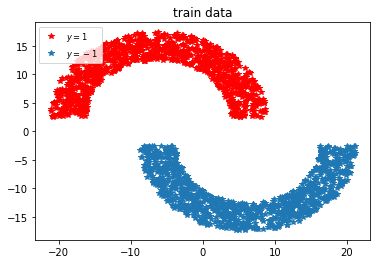

In [202]:
point_num = 2000  #generate 2000 points
rad = 10 #radius
thk = 5  #thickness
sep = 5  #seperate

train_data,train_label = generate_datapoints(point_num,rad,thk,sep)
visulize_data(train_data,train_label,'train data')

In [203]:
def pla(data,label):
    w = [0,0,0]
    #print('w0=',w)
    all_correct = False
    error_history=[]
    while not all_correct:
        err_num = 0 #每次训练从头开始时，错判个数重置
        all_correct = True
        for i in range(data.shape[0]):
            temp = np.dot(w,data[i])
            #if temp == 0:
            #    temp == -1
            if np.sign(temp) != np.sign(label[i]):
                w += label[i]*data[i]
                all_correct = False
                err_num +=1
        error_history.append(err_num)
    return w,error_history

In [204]:
w,error_history = pla(train_data,train_label)
print('w=',w)
print(error_history)

w= [-1.80428757 28.48451157  1.        ]
[5, 0]


,in-sample error
0,5
1,0


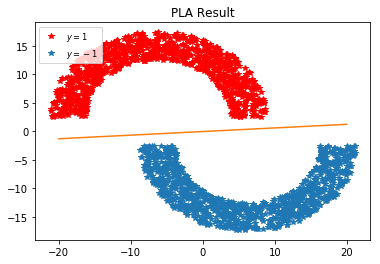

In [205]:
#test data分割
visulize_data(train_data,train_label,'PLA Result')
y_1= -w[0]/w[1]*-20 - w[2]/w[1]
y_2= -w[0]/w[1]*20 - w[2]/w[1]
plt.plot([-20,20],[y_1,y_2])
pd.DataFrame(error_history,columns=['in-sample error'])

5.(b)

In [206]:
point_num = 2000  #generate 2000 points
rad = 10 #radius
thk = 5  #thickness
seps = np.linspace(0.2,5,24)  #seperate
iteration_times_history = []
for sep in seps:
    train_data,train_label = generate_datapoints(point_num,rad,thk,sep)
    w,error_history = pla(train_data,train_label)
    iteration_times_history.append(sum(error_history))   #在list里添加这次pla的执行次数，把sum替换成len就是循环次数
iteration_times_history
#pd.DataFrame((seps,iteration_times_history),columns=['sep','in-sample error'])

[36,
 16,
 12,
 4,
 10,
 12,
 11,
 4,
 11,
 7,
 12,
 7,
 7,
 8,
 3,
 4,
 3,
 1,
 4,
 4,
 4,
 4,
 2,
 3]

Text(0, 0.5, 'Iteration times')

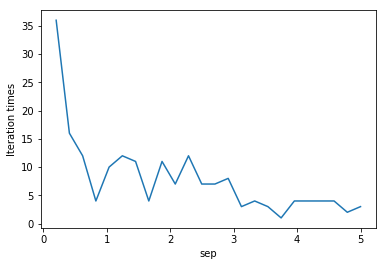

In [207]:
#pd.DataFrame(np.vstack((seps,iteration_times_history)).T,columns=['Sep','Iteration'])
plt.plot(seps,iteration_times_history)
plt.xlabel('sep')
plt.ylabel('Iteration times')

5.(c)

In [208]:
def pocket_pla(data,label,times):
    ######################
    def _calc_false(vec):
        error_num = 0
        for i in range(data.shape[0]):
            temp = np.dot(vec,data[i])
            if np.sign(temp) != np.sign(label[i]):
                error_num += 1
        return error_num
    
    ######################
    w = np.random.randn(3)
    least_false = _calc_false(w)
    least_false_history = [least_false]
    for i in range(times):
        random_num = int(np.random.choice(2000,1))#随机取一个点尝试更新w,这里的int不加，后面维度会出错
        temp = w.dot(data[random_num])
        if np.sign(temp) != np.sign(label[random_num]): #如果随机点被错误分类
            w2 = w + label[random_num]*data[random_num] #w2为更新后的权重，待后续验证
            w2_false = _calc_false(w2)
            
            if w2_false <= least_false:
                least_false = w2_false
                w = w2
        least_false_history.append(least_false)
    return w,least_false_history

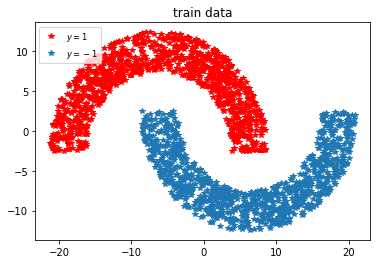

In [212]:
point_num = 2000  #generate 2000 points
rad = 10 #radius
thk = 5  #thickness
sep = -5  #seperate

train_data,train_label = generate_datapoints(point_num,rad,thk,sep)
visulize_data(train_data,train_label,'train data')

Text(0, 0.5, 'E_in')

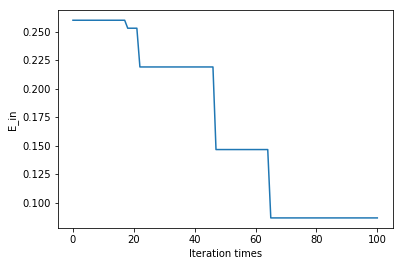

In [213]:
w,pocket_history = pocket_pla(train_data,train_label,100)
plt.plot(range(101),np.array(pocket_history)/point_num)
plt.xlabel('Iteration times')
plt.ylabel('E_in')

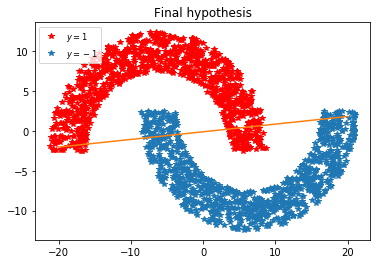

In [86]:
visulize_data(train_data,train_label,'Final hypothesis')
y_1= -w[0]/w[1]*-20 - w[2]/w[1]
y_2= -w[0]/w[1]*20 - w[2]/w[1]
plt.plot([-20,20],[y_1,y_2])

5.(d)
3rd polynomial feature transform      
$$f(x)= (1,x_1,x_2,x_1^2,x_2^2,x_1x_2,x_1^3,x_2^3,x_1^2x_2,x_1x_2^2)$$

In [226]:
point_num = 2000  #generate 2000 points
rad = 10 #radius
thk = 5  #thickness
sep = -5  #seperate

train_data,train_label = generate_datapoints(point_num,rad,thk,sep)
#visulize_data(train_data,train_label,'train data')

In [227]:
x1 = train_data[:,0].reshape(-1,1)
x2 = train_data[:,1].reshape(-1,1)
third_order_data = np.hstack((np.ones_like(x1),x1,x2,np.power(x1,2),np.power(x2,2),x1*x2,\
                              np.power(x1,3),np.power(x2,3),np.power(x1,2)*x2,np.power(x2,2)*x1))
third_order_data[0:2]


array([[ 1.00000000e+00,  1.84398177e+01,  1.23594778e+00,
         3.40026878e+02,  1.52756691e+00,  2.27906517e+01,
         6.27003365e+03,  1.88799292e+00,  4.20255463e+02,
         2.81680553e+01],
       [ 1.00000000e+00, -6.02922687e+00, -1.30319778e-01,
         3.63515767e+01,  1.69832447e-02,  7.85727510e-01,
        -2.19171903e+02, -2.21325268e-03, -4.73732942e+00,
        -1.02395835e-01]])

In [228]:
def third_oder_pla(data,label,times):
    #print('data:',data[0])
    ######################
    def _calc_false(vec):
        error_num = 0
        for i in range(data.shape[0]):
            temp = np.dot(vec,data[i])
            if np.sign(temp) != np.sign(label[i]):
                error_num += 1
        return error_num
    
    ######################
    w = data[0]#np.random.randn(10)*5
    least_false = _calc_false(w)
    least_false_history = [least_false]
    for i in range(times):
        random_num = int(np.random.choice(2000,1))#随机取一个点尝试更新w,这里的int不加，后面维度会出错
        temp = w.dot(data[random_num])
        if np.sign(temp) != np.sign(label[random_num]): #如果随机点被错误分类
            w2 = w + label[random_num]*data[random_num] #w2为更新后的权重，待后续验证
            w2_false = _calc_false(w2)
            
            if w2_false <= least_false:
                least_false = w2_false
                w = w2
        least_false_history.append(least_false)
    return w,least_false_history

Text(0, 0.5, 'E_in')

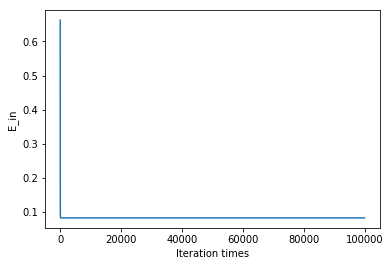

In [236]:
w,pocket_history = third_oder_pla(third_order_data,train_label,100000)
plt.plot(range(100001),np.array(pocket_history)/point_num)
plt.xlabel('Iteration times')
plt.ylabel('E_in')

In [237]:
map1 = np.linspace(-15,15,200).reshape(-1,1)
map2 = np.linspace(-22,22,200).reshape(-1,1)

z = np.hstack((np.ones_like(map1),map1,map2,np.power(map1,2),np.power(map2,2),map1*map2,\
                              np.power(map1,3),np.power(map2,3),np.power(map1,2)*map2,np.power(map2,2)*map1)).dot(w)


In [238]:
xv,yv = np.meshgrid(map1,map2)
map1 = xv.reshape(-1,1)
map2 = yv.reshape(-1,1)


In [239]:
z = np.hstack((np.ones_like(map1),map1,map2,np.power(map1,2),np.power(map2,2),map1*map2,\
                              np.power(map1,3),np.power(map2,3),np.power(map1,2)*map2,np.power(map2,2)*map1)).dot(w)


In [240]:
def visualize_third_oder(data,label,title):
    z1=data[np.where(label >0)[0]]
    z2=data[np.where(label <=0)[0]]
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(z1[:,0], z1[:,1],'r*',label = '$y = 1$')
    ax.plot(z2[:,0], z2[:,1],'*', label = '$y =-1$')
    plt.title(title)
    ax.legend(loc = 'upper left', fontsize = 'small')

In [243]:
#visualize_third_oder(np.hstack((map1,map2)),z,'curve')

In [242]:
w

array([ 0.00000000e+00,  1.78692533e+00,  2.29063709e+01,  5.23639452e+02,
       -1.03300507e+01, -1.23515180e+01, -5.07392011e+02,  1.83186494e+03,
        3.88668194e+03, -2.31439503e+03])